In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy.stats import norm
import pylab
import random

import os

In [3]:
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [4]:
#A partir de aquí python sabe en que carpeta se encuentran los datos
os.chdir("/home/christian/MEGA/PostDoc_UIS/LAGO/Workshop_LAGO")
os.getcwd()

'/home/christian/MEGA/PostDoc_UIS/LAGO/Workshop_LAGO'

### Simulaciones

Breve script para graficar la distribución lateral de partículas generada por un rayo cósmico primario.

In [29]:
df= pd.read_table(r"salida_apx.dst", delimiter=" ", skiprows=7, skipinitialspace=True, skipfooter=7,
                 names=["distance_in_bin", "N_phot", "N_e+", "N_e-", "N_mu+", "N_mu-", "N_pi0", 
                         "N_pi+", "N_pi-", "N_n", "N_p", "N_pbar", "N_others", "Total_per_bin"])
df.head()

/tmp/ipykernel_41623/4285679937.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df= pd.read_table(r"salida_apx.dst", delimiter=" ", skiprows=7, skipinitialspace=True, skipfooter=7,


,distance_in_bin,N_phot,N_e+,N_e-,N_mu+,N_mu-,N_pi0,N_pi+,N_pi-,N_n,N_p,N_pbar,N_others,Total_per_bin
0,3.981072,0.034338,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034338
1,5.011872,0.021666,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.021666
2,6.309573,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,7.943282,0.008625,0.0,0.008625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017251
4,10.000000,0.010884,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010884


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  29 non-null     float64
 1   N_phot           29 non-null     float64
 2   N_e+             29 non-null     float64
 3   N_e-             29 non-null     float64
 4   N_mu+            29 non-null     float64
 5   N_mu-            29 non-null     float64
 6   N_pi0            29 non-null     float64
 7   N_pi+            29 non-null     float64
 8   N_pi-            29 non-null     float64
 9   N_n              29 non-null     float64
 10  N_p              29 non-null     float64
 11  N_pbar           29 non-null     float64
 12  N_others         29 non-null     float64
 13  Total_per_bin    29 non-null     float64
dtypes: float64(14)
memory usage: 3.3 KB


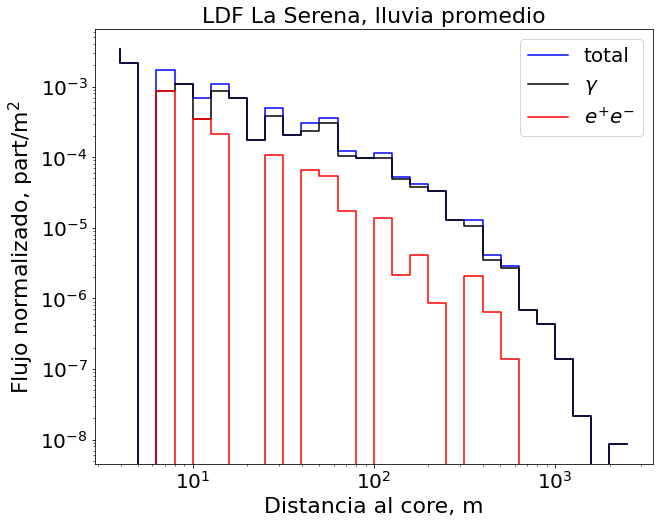

In [32]:
plt.figure(figsize=(10,8))
plt.step(df["distance_in_bin"], df["Total_per_bin"]/10, c="b", label=r"total")
plt.step(df["distance_in_bin"], df["N_phot"]/10, c="k", label=r"$\gamma$")
plt.step(df["distance_in_bin"], (df["N_e+"]+df["N_e-"])/10, c="r", label=r"$e^{+}e^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"LDF La Serena, lluvia promedio", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Flujo normalizado, part/m$^2$")
plt.legend(fontsize=20)

In [20]:
de1= pd.read_table(r"salida_apx.dse", delimiter=" ", skiprows=7, skipinitialspace=True,
                 names=["distance_in_bin", "E_phot", "E_e+", "E_e-", "E_mu+", "E_mu-", "E_pi0", "E_pi+", "E_pi-",
                        "E_n", "E_p", "E_pbar", "E_others", "Total_E_per_bin"])
de1.head()

,distance_in_bin,E_phot,E_e+,E_e-,E_mu+,E_mu-,E_pi0,E_pi+,E_pi-,E_n,E_p,E_pbar,E_others,Total_E_per_bin
0,3.981072,0.045448,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045448
1,5.011872,0.000133,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000133
2,6.309573,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,7.943282,0.005571,0.0,0.000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005682
4,10.000000,0.000015,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000015


In [21]:
de1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   distance_in_bin  29 non-null     float64
 1   E_phot           29 non-null     float64
 2   E_e+             29 non-null     float64
 3   E_e-             29 non-null     float64
 4   E_mu+            29 non-null     float64
 5   E_mu-            29 non-null     float64
 6   E_pi0            29 non-null     float64
 7   E_pi+            29 non-null     float64
 8   E_pi-            29 non-null     float64
 9   E_n              29 non-null     float64
 10  E_p              29 non-null     float64
 11  E_pbar           29 non-null     float64
 12  E_others         29 non-null     float64
 13  Total_E_per_bin  29 non-null     float64
dtypes: float64(14)
memory usage: 3.3 KB


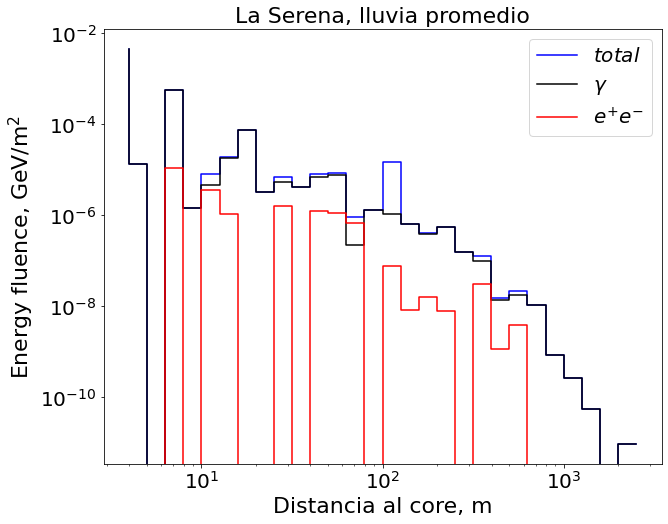

In [33]:
plt.figure(figsize=(10,8))
plt.step(de1["distance_in_bin"], de1["Total_E_per_bin"]/10, c="b", label=r"$total$")
plt.step(de1["distance_in_bin"], de1["E_phot"]/10, c="k", label=r"$\gamma$")
plt.step(de1["distance_in_bin"], (de1["E_e+"]+de1["E_e-"])/10, c="r", label=r"$e^{+}e^{-}$")
plt.xscale("log")
plt.yscale("log")
#plt.xlim(0, 200)
plt.title(r"La Serena, lluvia promedio", fontsize=22)
plt.xlabel("Distancia al core, m")
plt.ylabel(r"Energy fluence, GeV/m$^2$")
plt.legend(fontsize=20)
plt.savefig("prueba.png")